In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = pd.read_csv("../flare_tables/20200227_vetted_flares_lacking_some.csv")
df = df[df.complex==0]

In [90]:
df1 = df[(df.real==1) &
        (df.st>6) &
        (df.ampl_rec > 0.05) &
        (df.ampl_rec < .5)]
df2 = df[(df.real==1) &
        (df.st==6) &
        (df.ampl_rec > 0.05) &
        (df.ampl_rec < .5)]

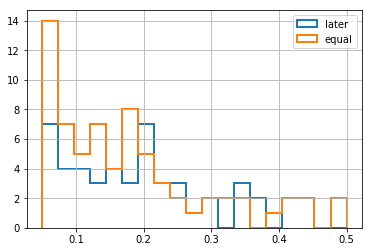

In [93]:
df1.ampl_rec.hist(bins=np.linspace(.05,.5,20), histtype="step", linewidth=2, label="later")
df2.ampl_rec.hist(bins=np.linspace(.05,.5,20), histtype="step", linewidth=2, label="equal")
plt.legend()

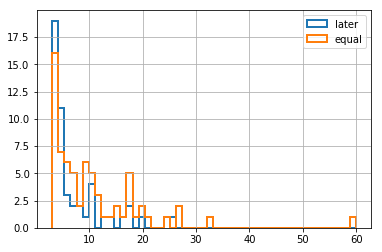

In [94]:
(df1.cstop-df1.cstart).hist(bins=np.linspace(3,60,50), histtype="step", linewidth=2, label="later")
(df2.cstop-df2.cstart).hist(bins=np.linspace(3,60,50), histtype="step", linewidth=2, label="equal")
plt.legend()

In [85]:
for i in range(0,df2.shape[0]):
    l = df2[["TIC","sector","cstart"]].iloc[i]
    s =f"{str(l.TIC).zfill(16)}_{l.sector}_{l.cstart}.csv"
    f = pd.read_csv(f"../flare_snippets/{s}")
    plt.figure()
    plt.plot(f.c, f.f, label=f"TIC {l.TIC} sector {l.sector}, c={l.cstart}")
    plt.legend()
    plt.savefig(f"../plots/{i}.png")
    plt.close()